# Prácticas ESAC: Kerutt 2022 Data

1. LAEs Data: Kerutt 2022
2. Escape fraction of Ly$\alpha$ photons: $f_{esc,Ly\alpha}$
3. Intrinsic Ly$\alpha$ photons
4. Number of ionizing photons $N_{ion}$
5. Continuum luminosity $L_{1200}$

   Appendix A: Saving data

$\textit{Juan A. Molina-Calzada}$

In [1]:
# Packages
from astropy.table import QTable
from astropy.io import ascii
import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
import smplotlib


## 1. LAEs Data: Kertutt 2022

Leemos los datos de la tabla B1 de Kerutt et al. (2022). Cada fila se corresponde con una LAE.

In [2]:
# Data LAEs
tableb1_raw = QTable.read('tableb1_Kerutt22_raw.dat', format = 'ascii', delimiter = ' ')


### 1.1. Correcting format LAEs Data 

Corregimos el formato de los datos de la tabla (sustituimos str por floats, renombramos las columnas, añadimos unidades, etc).

In [3]:
# Rename columns
col_names = ['ID', 'I17ID', 'RAdeg', 'DEdeg', 'z', 'e_z', 'Conf', 'EW0', 'e_EW0', 'MUV', 'e_MUV', 'logLLya', 'e_logLLya', 'Peaksep', 'e_Peaksep', 'FWHM', 'e_FWHM', 'Asym', 'e_Asym', 'Re', 'e_Re', 'axisratio', 'e_axisratio']

# Change str -> floats
try:
    for i in range(len(tableb1_raw[:][0])):
        for j in range(len(tableb1_raw[f'col{i+1}'])):
            
            try:
                tableb1_raw[f'col{i+1}'][j] = tableb1_raw[f'col{i+1}'][j].replace(',', '.')
                
            except:
                tableb1_raw[f'col{i+1}'][j] = tableb1_raw[f'col{i+1}'][j] 
                
        if tableb1_raw[f'col{i+1}'].dtype != 'int64':
            tableb1_raw[f'col{i+1}'] = tableb1_raw[f'col{i+1}'].astype(float)
            
        else:
            tableb1_raw[f'col{i+1}'] = tableb1_raw[f'col{i+1}']
            
        tableb1_raw.rename_column(f'col{i+1}',col_names[i])

except:
    pass

# Asignamos unidades a las columnas
if 'celda_ejecutada' not in globals():

    tableb1 = tableb1_raw.copy()
    tableb1_raw['RAdeg'] = tableb1_raw['RAdeg']*u.deg
    tableb1_raw['DEdeg'] = tableb1_raw['DEdeg']*u.deg
    tableb1_raw['EW0'] = tableb1_raw['EW0']*u.angstrom
    tableb1_raw['e_EW0'] = tableb1_raw['e_EW0']*u.angstrom
    tableb1_raw['MUV'] = tableb1_raw['MUV']*u.mag
    tableb1_raw['e_MUV'] = tableb1_raw['e_MUV']*u.mag
    tableb1_raw['logLLya'] = tableb1_raw['logLLya']*u.dex(u.erg/u.s)
    tableb1_raw['e_logLLya'] = tableb1_raw['e_logLLya']*u.dex(u.erg/u.s)
    tableb1_raw['Peaksep'] = tableb1_raw['Peaksep']*u.km/u.s
    tableb1_raw['e_Peaksep'] = tableb1_raw['e_Peaksep']*u.km/u.s
    tableb1_raw['FWHM'] = tableb1_raw['FWHM']*u.km/u.s
    tableb1_raw['e_FWHM'] = tableb1_raw['e_FWHM']*u.km/u.s
    tableb1_raw['Re'] = tableb1_raw['Re']*u.kpc
    tableb1_raw['e_Re'] = tableb1_raw['e_Re']*u.kpc

    globals()['celda_ejecutada'] = True

tableb1 = tableb1_raw
tableb1

ID,I17ID,RAdeg,DEdeg,z,e_z,Conf,EW0,e_EW0,MUV,e_MUV,logLLya,e_logLLya,Peaksep,e_Peaksep,FWHM,e_FWHM,Asym,e_Asym,Re,e_Re,axisratio,e_axisratio
,,deg,deg,,,,Angstrom,Angstrom,mag,mag,dex(erg / s),dex(erg / s),km / s,km / s,km / s,km / s,,,kpc,kpc,,
int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
100628,1240,53.13779,-27.79553,2.9167,0.0008,3,19.77,2.98,-19.29,0.041,41.95,0.34,472.86,80.99,290.54,52.02,0.13,0.05,10.74,0.43,0.28,0.01
150686,3658,53.14888,-27.80989,2.9271,0.0112,2,82.65,30.32,-16.846,0.298,41.6,0.55,0.0,0.0,166.53,102.32,-0.05,0.12,0.91,0.48,1.0,0.0
160687,2582,53.15514,-27.76235,2.9273,0.0008,3,133.46,29.23,-17.297,0.2,41.99,0.27,442.75,84.14,280.66,57.69,0.16,0.05,1.0,0.0,1.0,0.0
180689,2377,53.1512,-27.76754,2.9266,0.0008,2,66.08,16.79,-17.555,0.147,41.78,0.49,421.1,72.27,308.81,106.24,0.21,0.09,1.7,0.3,0.73,0.17
240899,2178,53.14876,-27.77169,2.944,0.003,2,47.19,11.05,-17.827,0.134,41.75,0.46,0.0,0.0,192.34,60.22,0.17,0.06,0.79,0.13,1.0,0.0
250900,7085,53.13323,-27.78672,2.9419,0.0013,3,78.08,8.07,-18.585,0.077,42.27,0.17,910.89,140.7,358.34,28.36,0.18,0.02,2.51,0.14,0.58,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404028319,0,53.28152,-27.86737,3.8978,0.003,1,235.49,0.0,-16.108,0.0,41.76,1.68,0.0,0.0,78.24,217.77,-0.21,0.21,1.0,0.0,1.0,0.0


## 2. Escape fraction of Ly$\alpha$ photons: $f_{esc,Ly\alpha}$

Calculamos la fracción de escape de fotones Lyman alpha en función de la anchura equivalente (EW) para corroboral la relacion obtenida por Sobral et al. (2019). Nótese que la relación de Sobral sólo se cumple para 0<EW<200A.

$$
\begin{equation}
    f_{esc,Ly\alpha} = 0.0048(\pm 0.0007)EW_0 \pm 0.05
\end{equation}
$$

Asignamos los valores de fracción de escape de fotones Lyman alpha calculados con la relación de Sobral a cada galaxia. Para aquellas con EW > 200A, asumimos que la fracción de escape es total, es decir, igual a 1. Añadimos los nuevos datos como un nueva columna en tableb1.

In [4]:
# Calculation of f_esc_Lya for all LAEs
f_esc_Lya = []

for i in range(len(tableb1['EW0'])):
    if 0 <= tableb1['EW0'][i].value <= 200:
        f_esc_Lya.append(0.0048*tableb1['EW0'][i].value)
    else:
        f_esc_Lya.append(1)

# Add new columns with f_esc_Lya
tableb1['f_esc_Lya'] = np.round(f_esc_Lya,3)
tableb1

ID,I17ID,RAdeg,DEdeg,z,e_z,Conf,EW0,e_EW0,MUV,e_MUV,logLLya,e_logLLya,Peaksep,e_Peaksep,FWHM,e_FWHM,Asym,e_Asym,Re,e_Re,axisratio,e_axisratio,f_esc_Lya
,,deg,deg,,,,Angstrom,Angstrom,mag,mag,dex(erg / s),dex(erg / s),km / s,km / s,km / s,km / s,,,kpc,kpc,,,
int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
100628,1240,53.13779,-27.79553,2.9167,0.0008,3,19.77,2.98,-19.29,0.041,41.95,0.34,472.86,80.99,290.54,52.02,0.13,0.05,10.74,0.43,0.28,0.01,0.095
150686,3658,53.14888,-27.80989,2.9271,0.0112,2,82.65,30.32,-16.846,0.298,41.6,0.55,0.0,0.0,166.53,102.32,-0.05,0.12,0.91,0.48,1.0,0.0,0.397
160687,2582,53.15514,-27.76235,2.9273,0.0008,3,133.46,29.23,-17.297,0.2,41.99,0.27,442.75,84.14,280.66,57.69,0.16,0.05,1.0,0.0,1.0,0.0,0.641
180689,2377,53.1512,-27.76754,2.9266,0.0008,2,66.08,16.79,-17.555,0.147,41.78,0.49,421.1,72.27,308.81,106.24,0.21,0.09,1.7,0.3,0.73,0.17,0.317
240899,2178,53.14876,-27.77169,2.944,0.003,2,47.19,11.05,-17.827,0.134,41.75,0.46,0.0,0.0,192.34,60.22,0.17,0.06,0.79,0.13,1.0,0.0,0.227
250900,7085,53.13323,-27.78672,2.9419,0.0013,3,78.08,8.07,-18.585,0.077,42.27,0.17,910.89,140.7,358.34,28.36,0.18,0.02,2.51,0.14,0.58,0.05,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404028319,0,53.28152,-27.86737,3.8978,0.003,1,235.49,0.0,-16.108,0.0,41.76,1.68,0.0,0.0,78.24,217.77,-0.21,0.21,1.0,0.0,1.0,0.0,1.0


### 2.1. Errors in fraction of Ly$\alpha$ photons

Calculamos ahora los errores de la función de escape de Lyman alpha acorde a la relación de Sobral et al. (2019).

$$
\begin{equation}
    \Delta f_{esc,Ly\alpha} = 0.0048(\pm 0.0007)\Delta EW_0
\end{equation}
$$

In [5]:
# Calculation of f_esc_Lya for all LAEs
e_f_esc_Lya = []

for i in range(len(tableb1['EW0'])):
    if 0 <= tableb1['EW0'][i].value <= 200:
        e_f_esc_Lya.append(0.0048*tableb1['e_EW0'][i].value)
    else:
        e_f_esc_Lya.append(0)

# Add new columns with e_f_esc_Lya
tableb1['e_f_esc_Lya'] = np.round(e_f_esc_Lya,3)
tableb1

ID,I17ID,RAdeg,DEdeg,z,e_z,Conf,EW0,e_EW0,MUV,e_MUV,logLLya,e_logLLya,Peaksep,e_Peaksep,FWHM,e_FWHM,Asym,e_Asym,Re,e_Re,axisratio,e_axisratio,f_esc_Lya,e_f_esc_Lya
,,deg,deg,,,,Angstrom,Angstrom,mag,mag,dex(erg / s),dex(erg / s),km / s,km / s,km / s,km / s,,,kpc,kpc,,,,
int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
100628,1240,53.13779,-27.79553,2.9167,0.0008,3,19.77,2.98,-19.29,0.041,41.95,0.34,472.86,80.99,290.54,52.02,0.13,0.05,10.74,0.43,0.28,0.01,0.095,0.014
150686,3658,53.14888,-27.80989,2.9271,0.0112,2,82.65,30.32,-16.846,0.298,41.6,0.55,0.0,0.0,166.53,102.32,-0.05,0.12,0.91,0.48,1.0,0.0,0.397,0.146
160687,2582,53.15514,-27.76235,2.9273,0.0008,3,133.46,29.23,-17.297,0.2,41.99,0.27,442.75,84.14,280.66,57.69,0.16,0.05,1.0,0.0,1.0,0.0,0.641,0.14
180689,2377,53.1512,-27.76754,2.9266,0.0008,2,66.08,16.79,-17.555,0.147,41.78,0.49,421.1,72.27,308.81,106.24,0.21,0.09,1.7,0.3,0.73,0.17,0.317,0.081
240899,2178,53.14876,-27.77169,2.944,0.003,2,47.19,11.05,-17.827,0.134,41.75,0.46,0.0,0.0,192.34,60.22,0.17,0.06,0.79,0.13,1.0,0.0,0.227,0.053
250900,7085,53.13323,-27.78672,2.9419,0.0013,3,78.08,8.07,-18.585,0.077,42.27,0.17,910.89,140.7,358.34,28.36,0.18,0.02,2.51,0.14,0.58,0.05,0.375,0.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404028319,0,53.28152,-27.86737,3.8978,0.003,1,235.49,0.0,-16.108,0.0,41.76,1.68,0.0,0.0,78.24,217.77,-0.21,0.21,1.0,0.0,1.0,0.0,1.0,0.0


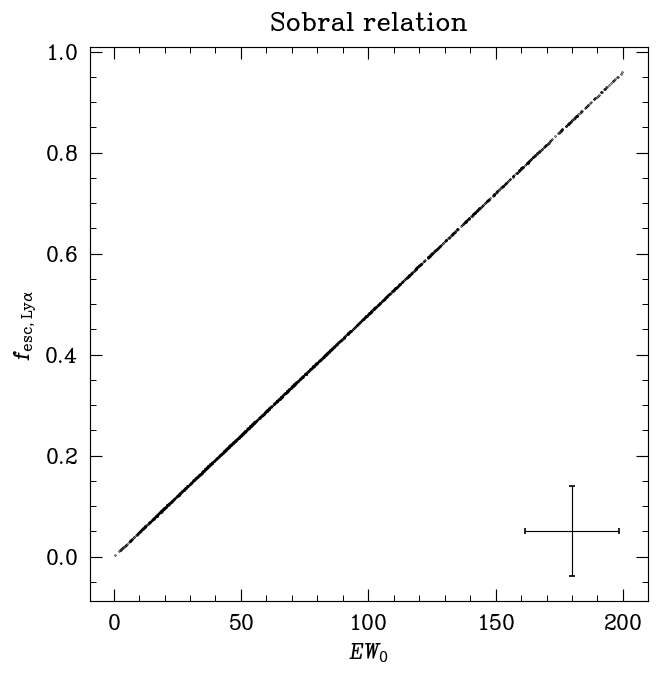

In [6]:
# Select range 0 < EW < 200A
EW_Sobral = []
e_EW_Sobral = []
e_f_esc_Lya_Sobral = []

for i in range(len(tableb1['EW0'])):
    if 0 <= tableb1['EW0'][i].value <= 200:
        EW_Sobral.append(tableb1['EW0'][i].value)
        e_EW_Sobral.append(tableb1['e_EW0'][i].value)
        e_f_esc_Lya_Sobral.append(round(0.0048*tableb1['e_EW0'][i].value,3))
        
EW_Sobral = np.array(EW_Sobral)
e_EW_Sobral = np.array(e_EW_Sobral)
e_f_esc_Lya_Sobral = np.array(e_f_esc_Lya_Sobral)

# Sobral et al. (2019)
f_esc_Lya_Sobral = 0.0048*EW_Sobral

plt.plot(EW_Sobral , f_esc_Lya_Sobral, ".", color = 'black',markersize = 0.7)

plt.errorbar(180, 0.05, yerr = np.mean(e_f_esc_Lya_Sobral), xerr = np.mean(e_EW_Sobral), linewidth = 0.7)

plt.xlabel('$EW_{0}$')
plt.ylabel('$f_{\mathrm{esc},\mathrm{Ly\\alpha}}$')
plt.title('Sobral relation')

plt.show()

Nótese que $EW_0$ = $EW_{0,L\alpha,obs}$ al igual que logLLy_a se refiere al logLLy_a_obs.

## 3. Intrinsic Ly$\alpha$ photons

A continuación, calculamos la luminosidad de la línea de Lyman alpha a partir de la definición de función de escape:

$$
\begin{equation}
    f_{esc,Ly\alpha} = \frac{L_{Ly\alpha,obs}}{L_{Ly\alpha,int}}
\end{equation}
$$

donde 

$$
\begin{equation}
    L_{Ly\alpha,i} = 10^{log_{10}({L_{Ly\alpha,i}})}
\end{equation}
$$

In [7]:
# Luminsoidad Lyman alpha intríseca (propia del objeto)
tableb1['logLLya_int'] = np.round(np.log10(10**tableb1['logLLya'].value/tableb1['f_esc_Lya']),3)*u.dex(u.erg/u.s)
tableb1

ID,I17ID,RAdeg,DEdeg,z,e_z,Conf,EW0,e_EW0,MUV,e_MUV,logLLya,e_logLLya,Peaksep,e_Peaksep,FWHM,e_FWHM,Asym,e_Asym,Re,e_Re,axisratio,e_axisratio,f_esc_Lya,e_f_esc_Lya,logLLya_int
,,deg,deg,,,,Angstrom,Angstrom,mag,mag,dex(erg / s),dex(erg / s),km / s,km / s,km / s,km / s,,,kpc,kpc,,,,,dex(erg / s)
int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
100628,1240,53.13779,-27.79553,2.9167,0.0008,3,19.77,2.98,-19.29,0.041,41.95,0.34,472.86,80.99,290.54,52.02,0.13,0.05,10.74,0.43,0.28,0.01,0.095,0.014,42.972
150686,3658,53.14888,-27.80989,2.9271,0.0112,2,82.65,30.32,-16.846,0.298,41.6,0.55,0.0,0.0,166.53,102.32,-0.05,0.12,0.91,0.48,1.0,0.0,0.397,0.146,42.001
160687,2582,53.15514,-27.76235,2.9273,0.0008,3,133.46,29.23,-17.297,0.2,41.99,0.27,442.75,84.14,280.66,57.69,0.16,0.05,1.0,0.0,1.0,0.0,0.641,0.14,42.183
180689,2377,53.1512,-27.76754,2.9266,0.0008,2,66.08,16.79,-17.555,0.147,41.78,0.49,421.1,72.27,308.81,106.24,0.21,0.09,1.7,0.3,0.73,0.17,0.317,0.081,42.279
240899,2178,53.14876,-27.77169,2.944,0.003,2,47.19,11.05,-17.827,0.134,41.75,0.46,0.0,0.0,192.34,60.22,0.17,0.06,0.79,0.13,1.0,0.0,0.227,0.053,42.394
250900,7085,53.13323,-27.78672,2.9419,0.0013,3,78.08,8.07,-18.585,0.077,42.27,0.17,910.89,140.7,358.34,28.36,0.18,0.02,2.51,0.14,0.58,0.05,0.375,0.039,42.696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404028319,0,53.28152,-27.86737,3.8978,0.003,1,235.49,0.0,-16.108,0.0,41.76,1.68,0.0,0.0,78.24,217.77,-0.21,0.21,1.0,0.0,1.0,0.0,1.0,0.0,41.76


### 3.1. Erros in intrinsic Ly$\alpha$ photons

El error viene dado por:

$$
\begin{equation}
    \Delta L_{Ly\alpha,int} = \sqrt{\left(\frac{\Delta L_{Ly\alpha,obs}}{f_{esc,Ly\alpha}}\right)^2 + \left(\frac{L_{Ly\alpha,obs}} {f_{esc,Ly\alpha}^2}\Delta f_{esc,Ly\alpha}\right)^2}
\end{equation}
$$

donde

$$
\begin{equation}
    \Delta L_{Ly\alpha,obs} = \Delta log_{10}(L_{Ly\alpha,obs}) \cdot L_{Ly\alpha,int} \cdot Ln(10) = \Delta log_{10}(L_{Ly\alpha,obs}) \cdot 10^{log_{10}({L_{Ly\alpha,obs}})} \cdot Ln(10)
\end{equation}
$$

In [8]:
# Error en la luminsoidad Lyman alpha intríseca (propia del objeto)
tableb1['e_logLLya_int'] = np.round((np.sqrt((tableb1['e_logLLya'].value*10**tableb1['logLLya'].value/tableb1['f_esc_Lya'])**2+(10**tableb1['logLLya'].value*tableb1['e_f_esc_Lya']/tableb1['f_esc_Lya']**2)**2)/10**tableb1['logLLya_int'].value),3)
tableb1['e_logLLya_int'] = np.round(tableb1['e_logLLya_int'] * (1/np.log(10)),3) *u.dex(u.erg/u.s)
tableb1

ID,I17ID,RAdeg,DEdeg,z,e_z,Conf,EW0,e_EW0,MUV,e_MUV,logLLya,e_logLLya,Peaksep,e_Peaksep,FWHM,e_FWHM,Asym,e_Asym,Re,e_Re,axisratio,e_axisratio,f_esc_Lya,e_f_esc_Lya,logLLya_int,e_logLLya_int
,,deg,deg,,,,Angstrom,Angstrom,mag,mag,dex(erg / s),dex(erg / s),km / s,km / s,km / s,km / s,,,kpc,kpc,,,,,dex(erg / s),dex(erg / s)
int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
100628,1240,53.13779,-27.79553,2.9167,0.0008,3,19.77,2.98,-19.29,0.041,41.95,0.34,472.86,80.99,290.54,52.02,0.13,0.05,10.74,0.43,0.28,0.01,0.095,0.014,42.972,0.161
150686,3658,53.14888,-27.80989,2.9271,0.0112,2,82.65,30.32,-16.846,0.298,41.6,0.55,0.0,0.0,166.53,102.32,-0.05,0.12,0.91,0.48,1.0,0.0,0.397,0.146,42.001,0.288
160687,2582,53.15514,-27.76235,2.9273,0.0008,3,133.46,29.23,-17.297,0.2,41.99,0.27,442.75,84.14,280.66,57.69,0.16,0.05,1.0,0.0,1.0,0.0,0.641,0.14,42.183,0.151
180689,2377,53.1512,-27.76754,2.9266,0.0008,2,66.08,16.79,-17.555,0.147,41.78,0.49,421.1,72.27,308.81,106.24,0.21,0.09,1.7,0.3,0.73,0.17,0.317,0.081,42.279,0.24
240899,2178,53.14876,-27.77169,2.944,0.003,2,47.19,11.05,-17.827,0.134,41.75,0.46,0.0,0.0,192.34,60.22,0.17,0.06,0.79,0.13,1.0,0.0,0.227,0.053,42.394,0.224
250900,7085,53.13323,-27.78672,2.9419,0.0013,3,78.08,8.07,-18.585,0.077,42.27,0.17,910.89,140.7,358.34,28.36,0.18,0.02,2.51,0.14,0.58,0.05,0.375,0.039,42.696,0.086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404028319,0,53.28152,-27.86737,3.8978,0.003,1,235.49,0.0,-16.108,0.0,41.76,1.68,0.0,0.0,78.24,217.77,-0.21,0.21,1.0,0.0,1.0,0.0,1.0,0.0,41.76,0.73


## 4. Number of ionizing photons $N_{ion}$

Con los parámetros calculados, es el momento de calcular el número de fotones ionizantes, es decir, el número de fotones con $\lambda < 912$ Å (límite de Lyman). Utilizamos la siguiente expresión,

$$
\begin{equation}
    L_{Ly\alpha,int} = 1.19 \cdot 10^{-11} N_{ion}
\end{equation}
$$

asumiendo las condiciones del caso B de Osterbrock y Telectrónica~10.000 K (la normal en regiones ionizadas). Nótese que estamos abusando de notación y $N_{ion}$ = $N_{ion, L\alpha,int}$. 

In [9]:
# Numero de fotones ionizantes
tableb1['logN_ion'] = np.round(np.log10(10**tableb1['logLLya_int'].value / (1.19*10**(-11))),3)*u.dex(1/u.s)
tableb1

ID,I17ID,RAdeg,DEdeg,z,e_z,Conf,EW0,e_EW0,MUV,e_MUV,logLLya,e_logLLya,Peaksep,e_Peaksep,FWHM,e_FWHM,Asym,e_Asym,Re,e_Re,axisratio,e_axisratio,f_esc_Lya,e_f_esc_Lya,logLLya_int,e_logLLya_int,logN_ion
,,deg,deg,,,,Angstrom,Angstrom,mag,mag,dex(erg / s),dex(erg / s),km / s,km / s,km / s,km / s,,,kpc,kpc,,,,,dex(erg / s),dex(erg / s),dex(1 / s)
int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
100628,1240,53.13779,-27.79553,2.9167,0.0008,3,19.77,2.98,-19.29,0.041,41.95,0.34,472.86,80.99,290.54,52.02,0.13,0.05,10.74,0.43,0.28,0.01,0.095,0.014,42.972,0.161,53.896
150686,3658,53.14888,-27.80989,2.9271,0.0112,2,82.65,30.32,-16.846,0.298,41.6,0.55,0.0,0.0,166.53,102.32,-0.05,0.12,0.91,0.48,1.0,0.0,0.397,0.146,42.001,0.288,52.925
160687,2582,53.15514,-27.76235,2.9273,0.0008,3,133.46,29.23,-17.297,0.2,41.99,0.27,442.75,84.14,280.66,57.69,0.16,0.05,1.0,0.0,1.0,0.0,0.641,0.14,42.183,0.151,53.107
180689,2377,53.1512,-27.76754,2.9266,0.0008,2,66.08,16.79,-17.555,0.147,41.78,0.49,421.1,72.27,308.81,106.24,0.21,0.09,1.7,0.3,0.73,0.17,0.317,0.081,42.279,0.24,53.203
240899,2178,53.14876,-27.77169,2.944,0.003,2,47.19,11.05,-17.827,0.134,41.75,0.46,0.0,0.0,192.34,60.22,0.17,0.06,0.79,0.13,1.0,0.0,0.227,0.053,42.394,0.224,53.318
250900,7085,53.13323,-27.78672,2.9419,0.0013,3,78.08,8.07,-18.585,0.077,42.27,0.17,910.89,140.7,358.34,28.36,0.18,0.02,2.51,0.14,0.58,0.05,0.375,0.039,42.696,0.086,53.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404028319,0,53.28152,-27.86737,3.8978,0.003,1,235.49,0.0,-16.108,0.0,41.76,1.68,0.0,0.0,78.24,217.77,-0.21,0.21,1.0,0.0,1.0,0.0,1.0,0.0,41.76,0.73,52.684


### 4.1 Errors in number of ionizing photons $N_{ion}$

Calculamos los errores en el número de fotones ionizantes como

$$
\begin{equation}
    \Delta N_{ion} = \frac{\Delta L_{Ly\alpha,int}}{1.19 \cdot 10^{-11}}
\end{equation}
$$

In [10]:
# Error en el número de fotones ionizantes
tableb1['e_logN_ion'] = np.round((tableb1['e_logLLya_int'].value*10**tableb1['logLLya_int'].value / (1.19*10**(-11))/(10**tableb1['logN_ion'].value)),3)
tableb1['e_logN_ion'] = np.round(tableb1['e_logN_ion'] * (1/np.log(10)),3) * u.dex(1/u.s)
tableb1

ID,I17ID,RAdeg,DEdeg,z,e_z,Conf,EW0,e_EW0,MUV,e_MUV,logLLya,e_logLLya,Peaksep,e_Peaksep,FWHM,e_FWHM,Asym,e_Asym,Re,e_Re,axisratio,e_axisratio,f_esc_Lya,e_f_esc_Lya,logLLya_int,e_logLLya_int,logN_ion,e_logN_ion
,,deg,deg,,,,Angstrom,Angstrom,mag,mag,dex(erg / s),dex(erg / s),km / s,km / s,km / s,km / s,,,kpc,kpc,,,,,dex(erg / s),dex(erg / s),dex(1 / s),dex(1 / s)
int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
100628,1240,53.13779,-27.79553,2.9167,0.0008,3,19.77,2.98,-19.29,0.041,41.95,0.34,472.86,80.99,290.54,52.02,0.13,0.05,10.74,0.43,0.28,0.01,0.095,0.014,42.972,0.161,53.896,0.07
150686,3658,53.14888,-27.80989,2.9271,0.0112,2,82.65,30.32,-16.846,0.298,41.6,0.55,0.0,0.0,166.53,102.32,-0.05,0.12,0.91,0.48,1.0,0.0,0.397,0.146,42.001,0.288,52.925,0.125
160687,2582,53.15514,-27.76235,2.9273,0.0008,3,133.46,29.23,-17.297,0.2,41.99,0.27,442.75,84.14,280.66,57.69,0.16,0.05,1.0,0.0,1.0,0.0,0.641,0.14,42.183,0.151,53.107,0.066
180689,2377,53.1512,-27.76754,2.9266,0.0008,2,66.08,16.79,-17.555,0.147,41.78,0.49,421.1,72.27,308.81,106.24,0.21,0.09,1.7,0.3,0.73,0.17,0.317,0.081,42.279,0.24,53.203,0.104
240899,2178,53.14876,-27.77169,2.944,0.003,2,47.19,11.05,-17.827,0.134,41.75,0.46,0.0,0.0,192.34,60.22,0.17,0.06,0.79,0.13,1.0,0.0,0.227,0.053,42.394,0.224,53.318,0.097
250900,7085,53.13323,-27.78672,2.9419,0.0013,3,78.08,8.07,-18.585,0.077,42.27,0.17,910.89,140.7,358.34,28.36,0.18,0.02,2.51,0.14,0.58,0.05,0.375,0.039,42.696,0.086,53.62,0.037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404028319,0,53.28152,-27.86737,3.8978,0.003,1,235.49,0.0,-16.108,0.0,41.76,1.68,0.0,0.0,78.24,217.77,-0.21,0.21,1.0,0.0,1.0,0.0,1.0,0.0,41.76,0.73,52.684,0.317


## 5. Continuum luminosity $L_{1200}$

A continuación, calculamos la luminosidad en el continuo de 1200 Å utilizando la definción de ancho equivalente: 

$$
\begin{equation}
    EW_0 = \frac{L_{Ly_\alpha,obs}}{L_{1200}}
\end{equation}
$$

In [11]:
# Luminosidad en el continua 1200
tableb1['logL1200'] = np.round(np.log10(10**tableb1['logLLya'].value / tableb1['EW0'].value),3)*u.dex(u.erg/u.s/u.AA)
tableb1

ID,I17ID,RAdeg,DEdeg,z,e_z,Conf,EW0,e_EW0,MUV,e_MUV,logLLya,e_logLLya,Peaksep,e_Peaksep,FWHM,e_FWHM,Asym,e_Asym,Re,e_Re,axisratio,e_axisratio,f_esc_Lya,e_f_esc_Lya,logLLya_int,e_logLLya_int,logN_ion,e_logN_ion,logL1200
,,deg,deg,,,,Angstrom,Angstrom,mag,mag,dex(erg / s),dex(erg / s),km / s,km / s,km / s,km / s,,,kpc,kpc,,,,,dex(erg / s),dex(erg / s),dex(1 / s),dex(1 / s),dex(erg / (Angstrom s))
int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
100628,1240,53.13779,-27.79553,2.9167,0.0008,3,19.77,2.98,-19.29,0.041,41.95,0.34,472.86,80.99,290.54,52.02,0.13,0.05,10.74,0.43,0.28,0.01,0.095,0.014,42.972,0.161,53.896,0.07,40.654
150686,3658,53.14888,-27.80989,2.9271,0.0112,2,82.65,30.32,-16.846,0.298,41.6,0.55,0.0,0.0,166.53,102.32,-0.05,0.12,0.91,0.48,1.0,0.0,0.397,0.146,42.001,0.288,52.925,0.125,39.683
160687,2582,53.15514,-27.76235,2.9273,0.0008,3,133.46,29.23,-17.297,0.2,41.99,0.27,442.75,84.14,280.66,57.69,0.16,0.05,1.0,0.0,1.0,0.0,0.641,0.14,42.183,0.151,53.107,0.066,39.865
180689,2377,53.1512,-27.76754,2.9266,0.0008,2,66.08,16.79,-17.555,0.147,41.78,0.49,421.1,72.27,308.81,106.24,0.21,0.09,1.7,0.3,0.73,0.17,0.317,0.081,42.279,0.24,53.203,0.104,39.96
240899,2178,53.14876,-27.77169,2.944,0.003,2,47.19,11.05,-17.827,0.134,41.75,0.46,0.0,0.0,192.34,60.22,0.17,0.06,0.79,0.13,1.0,0.0,0.227,0.053,42.394,0.224,53.318,0.097,40.076
250900,7085,53.13323,-27.78672,2.9419,0.0013,3,78.08,8.07,-18.585,0.077,42.27,0.17,910.89,140.7,358.34,28.36,0.18,0.02,2.51,0.14,0.58,0.05,0.375,0.039,42.696,0.086,53.62,0.037,40.377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404028319,0,53.28152,-27.86737,3.8978,0.003,1,235.49,0.0,-16.108,0.0,41.76,1.68,0.0,0.0,78.24,217.77,-0.21,0.21,1.0,0.0,1.0,0.0,1.0,0.0,41.76,0.73,52.684,0.317,39.388


### 5.1 Errors in continuum luminosity $L_{1200}$

Estimamos sus errors por medio de

$$
\begin{equation}
    \Delta L_{1200} = \sqrt{\left(\frac{\Delta L_{Ly\alpha,obs}}{EW_0}\right)^2 + \left(\frac{L_{Ly\alpha,obs}} {EW_0^2}\Delta EW_0\right)^2} 
\end{equation}
$$


In [12]:
# Error en la luminosidad en el continuo 1200
tableb1['e_logL1200'] = np.round(np.sqrt((tableb1['e_logLLya'].value*10**tableb1['logLLya'].value/tableb1['EW0'].value)**2+(10**tableb1['logLLya'].value*tableb1['e_EW0'].value/tableb1['EW0'].value**2)**2)/10**tableb1['logL1200'].value,3)
tableb1['e_logL1200'] = np.round(tableb1['e_logL1200'] * (1/np.log(10)),3) * u.dex(u.erg/u.s/u.AA)
tableb1


ID,I17ID,RAdeg,DEdeg,z,e_z,Conf,EW0,e_EW0,MUV,e_MUV,logLLya,e_logLLya,Peaksep,e_Peaksep,FWHM,e_FWHM,Asym,e_Asym,Re,e_Re,axisratio,e_axisratio,f_esc_Lya,e_f_esc_Lya,logLLya_int,e_logLLya_int,logN_ion,e_logN_ion,logL1200,e_logL1200
,,deg,deg,,,,Angstrom,Angstrom,mag,mag,dex(erg / s),dex(erg / s),km / s,km / s,km / s,km / s,,,kpc,kpc,,,,,dex(erg / s),dex(erg / s),dex(1 / s),dex(1 / s),dex(erg / (Angstrom s)),dex(erg / (Angstrom s))
int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
100628,1240,53.13779,-27.79553,2.9167,0.0008,3,19.77,2.98,-19.29,0.041,41.95,0.34,472.86,80.99,290.54,52.02,0.13,0.05,10.74,0.43,0.28,0.01,0.095,0.014,42.972,0.161,53.896,0.07,40.654,0.162
150686,3658,53.14888,-27.80989,2.9271,0.0112,2,82.65,30.32,-16.846,0.298,41.6,0.55,0.0,0.0,166.53,102.32,-0.05,0.12,0.91,0.48,1.0,0.0,0.397,0.146,42.001,0.288,52.925,0.125,39.683,0.287
160687,2582,53.15514,-27.76235,2.9273,0.0008,3,133.46,29.23,-17.297,0.2,41.99,0.27,442.75,84.14,280.66,57.69,0.16,0.05,1.0,0.0,1.0,0.0,0.641,0.14,42.183,0.151,53.107,0.066,39.865,0.151
180689,2377,53.1512,-27.76754,2.9266,0.0008,2,66.08,16.79,-17.555,0.147,41.78,0.49,421.1,72.27,308.81,106.24,0.21,0.09,1.7,0.3,0.73,0.17,0.317,0.081,42.279,0.24,53.203,0.104,39.96,0.24
240899,2178,53.14876,-27.77169,2.944,0.003,2,47.19,11.05,-17.827,0.134,41.75,0.46,0.0,0.0,192.34,60.22,0.17,0.06,0.79,0.13,1.0,0.0,0.227,0.053,42.394,0.224,53.318,0.097,40.076,0.224
250900,7085,53.13323,-27.78672,2.9419,0.0013,3,78.08,8.07,-18.585,0.077,42.27,0.17,910.89,140.7,358.34,28.36,0.18,0.02,2.51,0.14,0.58,0.05,0.375,0.039,42.696,0.086,53.62,0.037,40.377,0.086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404028319,0,53.28152,-27.86737,3.8978,0.003,1,235.49,0.0,-16.108,0.0,41.76,1.68,0.0,0.0,78.24,217.77,-0.21,0.21,1.0,0.0,1.0,0.0,1.0,0.0,41.76,0.73,52.684,0.317,39.388,0.73


## Appendix A: Saving data

Si se ejecuta el siguiente código, guardaremos y sobreescribiremo los datos. Nótese que lo guardamos en formato ecsv (formato profesional para astrofísica)

In [13]:
ascii.write(tableb1, 'tableb1_Kerutt22_v1.dat', format='ecsv', overwrite=True)  